## Data Pre-processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,1178.0,Wood,6.16,16.88,No,Yes,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",-1922.78
6,fffe3800360033003700,David Hawes,0.64,17.0,9.0,7264.0,Brass,8.26,90.67,No,Yes,No,Roadways,No,Working Class,No,06/05/16,06/02/16,"South Matthew, WV 76033",-1536.66
7,fffe3800300039003800,David Osher,0.74,23.0,10.0,3287.0,Clay,12.81,13.25,Yes,No,No,Waterways,Yes,Wealthy,No,06/04/19,05/31/19,"Davidmouth, CA 37824",-422.42
8,fffe3800330032003900,Arnold Reel,0.00,6.0,4.0,108.0,Clay,3.98,19.76,Yes,No,No,Waterways,Yes,Working Class,Yes,08/27/18,08/23/18,"Lisaville, ND 43925",-160.10
9,fffe3800310031003800,James Comfort,0.12,23.0,9.0,195226.0,Marble,245.63,49.25,No,No,No,Roadways,No,Working Class,No,07/14/16,07/10/16,"Jacobland, WV 85997",-834.27


## Data Cleaning 

### Null Values 

In [3]:
# features with nan i.e., Null values 
# printing their percentage of null values

features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,5),"% missing values")

Artist Reputation 11.53846 % missing values
Height 5.76923 % missing values
Width 8.98462 % missing values
Weight 9.03077 % missing values
Material 11.75385 % missing values
Transport 21.41538 % missing values
Remote Location 11.86154 % missing values


### Separating Features

In [4]:
target_feature = 'Cost'

# storing numerical and categorical features in a List

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
numerical_features.remove(target_feature)

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


print('We have {} many numerical comulms namely {}'.format((len(numerical_features)),(numerical_features)))
print('We have {} many categorical comulms namely {}'.format((len(categorical_features)),(categorical_features)))

We have 6 many numerical comulms namely ['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture', 'Base Shipping Price']
We have 13 many categorical comulms namely ['Customer Id', 'Artist Name', 'Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location', 'Scheduled Date', 'Delivery Date', 'Customer Location']


In [5]:
## Making the copy of original Dataframe df to a new dataframe 
## to make changes in the new dataframe to check for multicollinearity 

df1 = df.copy()

for i in numerical_features:
    df1[i].fillna(df1[i].median(),inplace=True)

In [6]:
import statsmodels.api as sm

for i in range(0, len(numerical_features)):
    x = df1.loc[:, df1.columns == numerical_features[i]]
    y = df1.Cost
    model = sm.OLS(x,y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            numerical_features[i], vif)
        )


Variance Inflation Factor of Artist Reputation column is 1.01 

Variance Inflation Factor of Height column is 1.01 

Variance Inflation Factor of Width column is 1.02 

Variance Inflation Factor of Weight column is 1.2 

Variance Inflation Factor of Price Of Sculpture column is 1.3 

Variance Inflation Factor of Base Shipping Price column is 1.01 



VIF is around 1 so there is not much Multicollinearity.

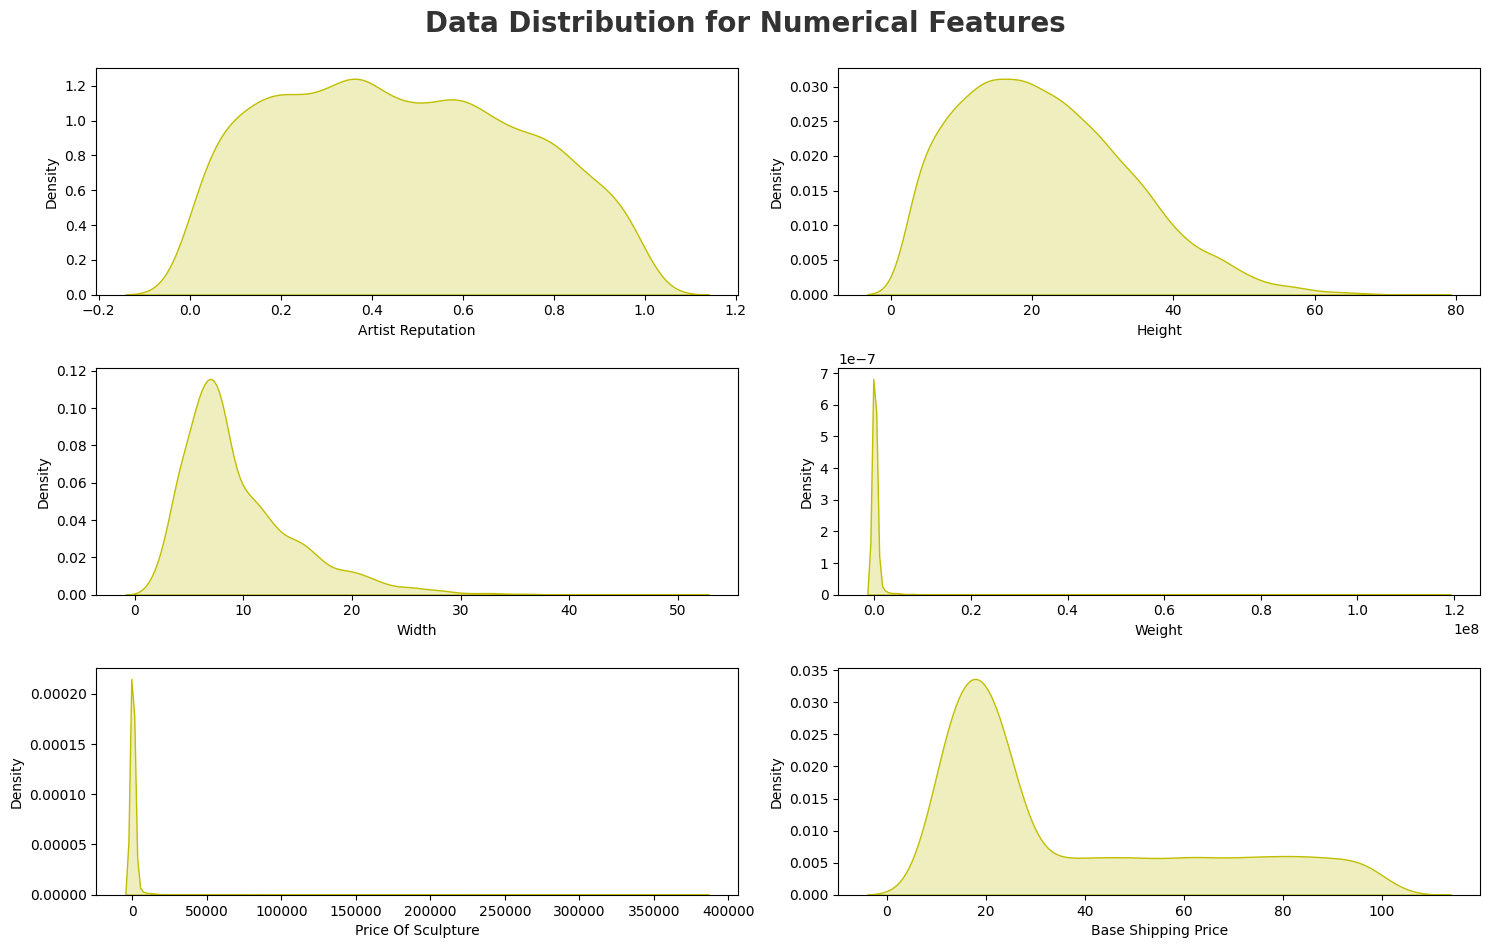

In [7]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='y')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [8]:
df[numerical_features].skew()

Artist Reputation       0.141363
Height                  0.594041
Width                   1.546702
Weight                 21.556174
Price Of Sculpture     22.206823
Base Shipping Price     0.918102
dtype: float64

Price Of Sculpture and Weight are extremely skewed on the positive side because of outliers.


power transformer or Log transformer can be used to handle this.


Width and Base Shipping Price are not much skewed.

Checking for power transformer on Outlier columns

In [9]:
outlier_feature = ['Price Of Sculpture', 'Weight']

In [10]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize=False)

outlier_data = df1[outlier_feature]

In [11]:
df1[outlier_feature] = pt.fit_transform(df1[outlier_feature])

In [12]:
df_outlier = pd.DataFrame(outlier_data, columns=outlier_feature)

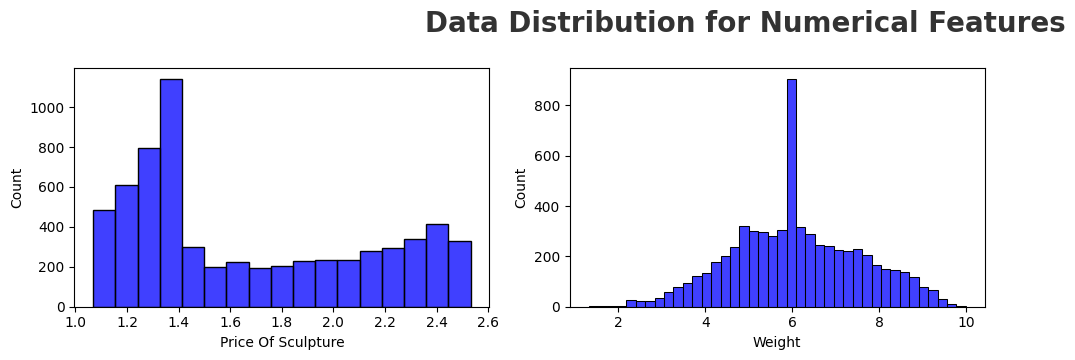

In [13]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution for Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(outlier_feature)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=df1[outlier_feature[i]], color='b')
    plt.xlabel(outlier_feature[i])
    plt.tight_layout()


In [14]:
df1[outlier_feature].skew()

Price Of Sculpture    0.478648
Weight                0.027309
dtype: float64

Removing Outlier from target column 

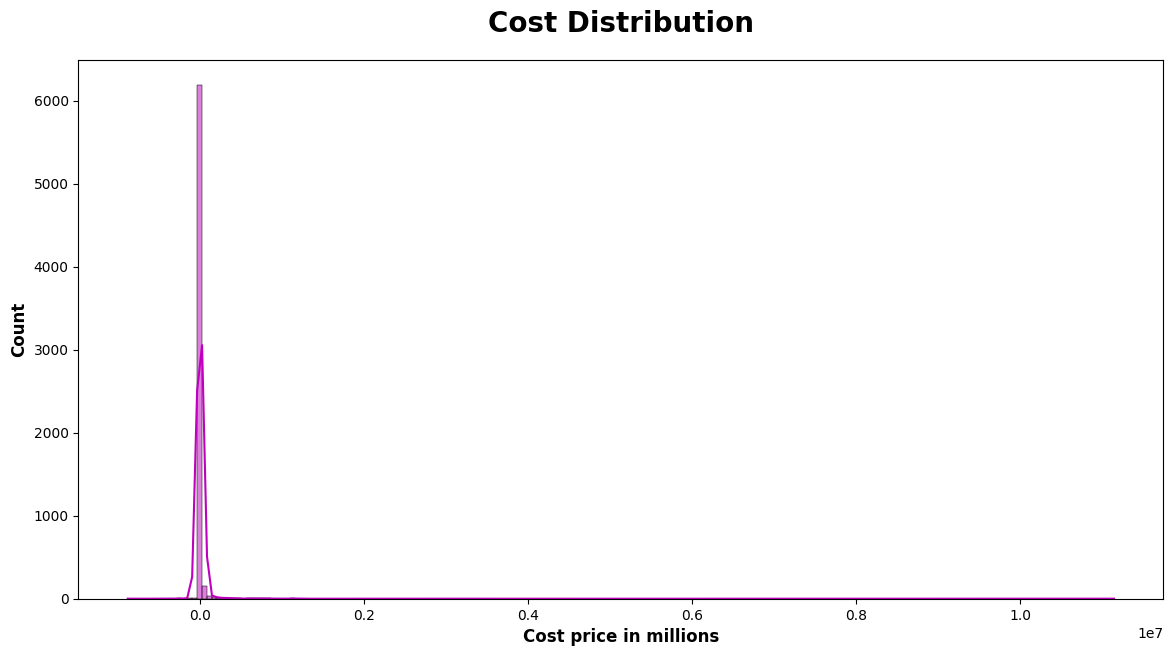

In [15]:
plt.subplots(figsize=(14,7))
sns.histplot(df['Cost'], bins=200, kde=True, color = 'm')
plt.title("Cost Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Cost price in millions", weight="bold", fontsize=12)
plt.show()

Need to apply transformation to target column to make it normally distributed. we use 1p to avoid `inf` values arise dued to `0` in the target column

In [16]:
df1['Cost'] = np.log1p(df1['Cost'])

(array([1973., 1985.,  954.,  461.,  223.,  127.,   64.,   32.,   16.,
           6.]),
 array([ 4.46671239,  5.64267721,  6.81864203,  7.99460685,  9.17057167,
        10.34653649, 11.5225013 , 12.69846612, 13.87443094, 15.05039576,
        16.22636058]),
 <BarContainer object of 10 artists>)

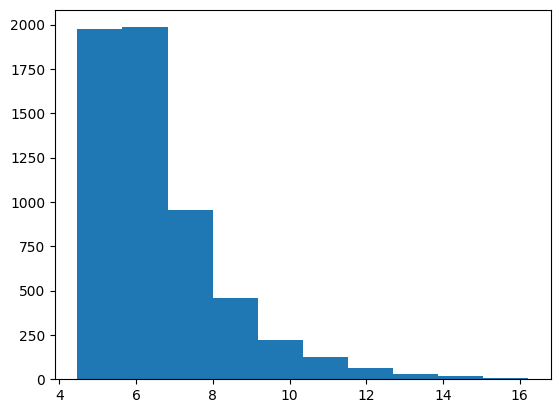

In [17]:
plt.hist(df1['Cost'])

Data looks good after the log transformation but not Normally distributed.

### Feature creation for Date columns

In [18]:
# Convert object datatype to datetime
df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])

In [19]:
df['Month'] = pd.to_datetime(df['Scheduled Date']).dt.month
df['Year'] = pd.to_datetime(df['Scheduled Date']).dt.year

numerical_features.append('Month')
numerical_features.append('Year')

### Drop unnecessary columns

Drop `Customer Id`, `Artist Name` and `Customer Location` columns having huge number of unique values.

`Scheduled Date` and `Delivery Date` can be dropped since the required features are extracted form it

In [20]:
to_drop_columns = ['Customer Id', 'Artist Name', 'Customer Location', 'Scheduled Date', 'Delivery Date']

In [21]:
df.drop(columns=to_drop_columns, inplace=True)

## Model Building

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

Splitting between X and y (Target Column)

In [23]:
X = df.drop(columns = ['Cost'], axis = 1)

y = np.abs(df['Cost'])

In [24]:
y = np.log1p(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Encoding and Scaling

**Selecting Numerical and categorical features for feature scaling**

In [29]:
numeric_features = [x for x in numerical_features if x not in outlier_feature]
categoric_features = [x for x in categorical_features if x not in to_drop_columns]

(numeric_features), (categoric_features), (outlier_feature)

(['Artist Reputation',
  'Height',
  'Width',
  'Base Shipping Price',
  'Month',
  'Year'],
 ['Material',
  'International',
  'Express Shipment',
  'Installation Included',
  'Transport',
  'Fragile',
  'Customer Information',
  'Remote Location'],
 ['Price Of Sculpture', 'Weight'])

In [30]:
numeric_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder()),
]
)

outliers_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(standardize=True))
])

preprocessor = ColumnTransformer(
    [
        ("Numeric Pipeline",numeric_features_pipeline, numeric_features),
        ("Categorical Features Pipeline",categorical_features_pipeline, categoric_features),
        ("Outliers Features Pipeline", outliers_features_pipeline, outlier_feature)
]
)

In [31]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Model Selection

In [32]:
# functions which takes true and predicted values to calculate metrics
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
# function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''    
    models_list = []
    r2_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_reg(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_reg(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model Name', 'r2_score']).sort_values(by=['r2_score'], ascending=False)
        
    return report

In [36]:
# Initialize models required for model
models = {
    "Linear Regression": LinearRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False, max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(), 
    "SVR": SVR()
}

In [37]:
base_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.7361
- Mean Absolute Error: 0.4989
- R2 Score: 0.8012
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6960
- Mean Absolute Error: 0.4847
- R2 Score: 0.8221


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5675
- Mean Absolute Error: 0.3614
- R2 Score: 0.8818
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6588
- Mean Absolute Error: 0.4263
- R2 Score: 0.8406


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5173
- Mean Absolute Error: 0.3224
- R2 Score: 0.9017


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1229
- Mean Absolute Error: 0.0784
- R2 Score: 0.99

In [38]:
base_report

,Model Name,r2_score
5,CatBoosting Regressor,0.971792
4,XGBRegressor,0.963607
3,Random Forest Regressor,0.956200
7,SVR,0.913033
2,Decision Tree,0.901716
6,AdaBoost Regressor,0.847181
1,K-Neighbors Regressor,0.840555
0,Linear Regression,0.822055


### Hyperparameter Tuning

In [39]:
#Initialize few parameter for Hyperparamter tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01, 0.6, 0.5],
              "max_depth": [4, 5, 6, 8, 12]}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), cat_params)
                   ]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'max_depth': 5, 'learning_rate': 0.1}


In [43]:
# reInitialize models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
     "CatBoosting Regressor": CatBoostRegressor(**model_param['CatBoost'],verbose=False)
}

In [44]:
retrained_report = evaluate_models(X_train, X_test, y_train, y_test, models)

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1445
- Mean Absolute Error: 0.0886
- R2 Score: 0.9923
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3627
- Mean Absolute Error: 0.2256
- R2 Score: 0.9517


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1412
- Mean Absolute Error: 0.0902
- R2 Score: 0.9927
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2946
- Mean Absolute Error: 0.1727
- R2 Score: 0.9681


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1461
- Mean Absolute Error: 0.0956
- R2 Score: 0.9922
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2789
- Mean Absolute Error: 0.1609
- R2 Score: 0.9714




In [45]:
retrained_report

,Model Name,r2_score
2,CatBoosting Regressor,0.971419
1,XGBRegressor,0.968127
0,Random Forest Regressor,0.951689
